# importing data

In [1]:
import numpy as np
import pandas as pd

In [2]:

data = pd.read_csv("Dataset3.csv",sep=';',decimal=',')

data.index = data.iloc[:,0]
df = data.iloc[:,1:]

In [3]:
df.head()

,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
No,,,,,,,,
4,Austria,Developed,Member,Euro,54.9,64.9,0.9,67.1
6,Belgium,Developed,Member,Euro,63.6,65.5,0.6,58
17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
18,Finland,Developed,Member,Euro,66.4,65.7,-0.2,67.7
19,France,Developed,Member,Euro,68.8,67.3,0,60.6


# Understanding data

In [4]:
print(df.shape)
df.isnull().sum() #checking null values

(51, 8)


Country                                  0
Level of development                     0
European Union Membership                0
Currency                                 0
Women Entrepreneurship Index             0
Entrepreneurship Index                   0
Inflation rate                           0
Female Labor Force Participation Rate    0
dtype: int64

In [5]:
df.describe(include='all') #Get basic idea of data

,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51,51,51,51,51,51,51,51
unique,51,2,2,2,50,49,37,48
top,Netherlands,Developed,Not Member,National Currency,63.6,54.6,-0.5,69.2
freq,1,27,31,36,2,2,5,2


In [6]:
df.dtypes

Country                                  object
Level of development                     object
European Union Membership                object
Currency                                 object
Women Entrepreneurship Index             object
Entrepreneurship Index                   object
Inflation rate                           object
Female Labor Force Participation Rate    object
dtype: object

In [7]:
df['Women Entrepreneurship Index']=df['Women Entrepreneurship Index'].apply(lambda x: float(x))
df['Entrepreneurship Index']=df['Entrepreneurship Index'].apply(lambda x: float(x))
df['Inflation rate']=df['Inflation rate'].apply(lambda x: float(x))
df['Female Labor Force Participation Rate']=df['Female Labor Force Participation Rate'].apply(lambda x: float(x))

In [8]:
df.dtypes

Country                                   object
Level of development                      object
European Union Membership                 object
Currency                                  object
Women Entrepreneurship Index             float64
Entrepreneurship Index                   float64
Inflation rate                           float64
Female Labor Force Participation Rate    float64
dtype: object

In [9]:
df.describe()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.000000,51.000000,51.000000,51.000000
mean,47.835294,47.241176,2.587647,58.481765
std,14.268480,16.193149,5.380639,13.864567
min,25.300000,24.800000,-2.250000,13.000000
25%,36.350000,31.900000,-0.500000,55.800000
50%,44.500000,42.700000,0.600000,61.000000
75%,59.150000,65.400000,3.600000,67.400000
max,74.800000,77.600000,26.500000,82.300000


# Use Visualization 

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df["Entrepreneurship Index"])
plt.show()

<Figure size 640x480 with 1 Axes>

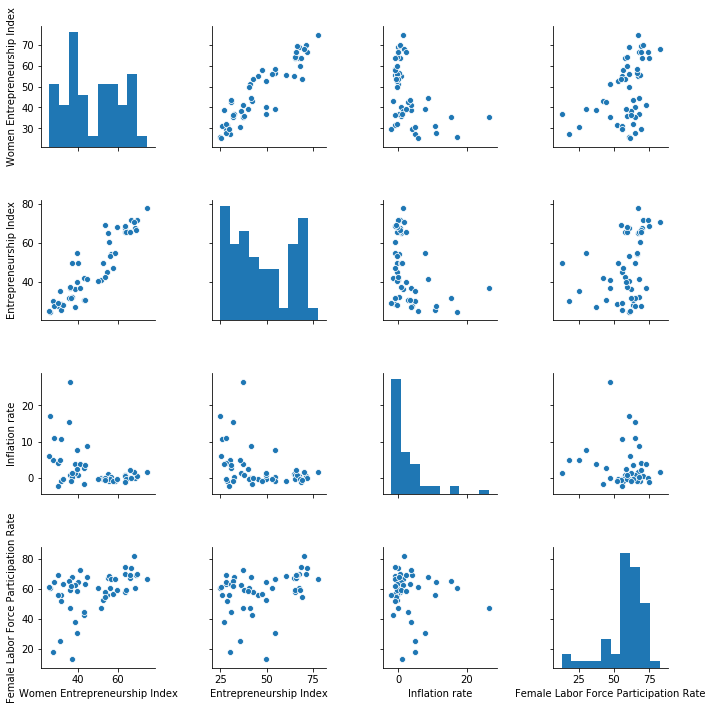

In [11]:
sns.pairplot(df)

# Outlier Detection

In [12]:
#Data seem to be unequally divided 
#we will check outlier in our data 
#An outlier is a data point in a data set that is distant from all other observations
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
t=(detect_outlier(df['Inflation rate']))
print("Total values in outlier"+str(len(t))) 
print("max values in outlier"+str(max(t))) 
print("min values in outlier"+str(min(t))) 
 

Total values in outlier1
max values in outlier26.5
min values in outlier26.5


In [13]:
#As there is only one outlier value so we ignore it. We will drop country column as it is only name of country with no effect
df.drop(columns=["Country"],inplace=True, axis=1)

# Dummy variable for categorical data

In [14]:
df=pd.get_dummies(df,drop_first=True)
df

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Level of development_Developing,European Union Membership_Not Member,Currency_National Currency
No,,,,,,,
4,54.9,64.9,0.90,67.10,0,0,0
6,63.6,65.5,0.60,58.00,0,0,0
17,55.4,60.2,-0.88,68.50,0,0,0
18,66.4,65.7,-0.20,67.70,0,0,0
19,68.8,67.3,0.00,60.60,0,0,0
20,63.6,67.4,0.50,69.90,0,0,0
22,43.0,42.0,-1.70,42.50,0,0,0
28,64.3,65.3,-0.30,59.40,0,0,0
30,51.4,41.3,0.00,47.20,0,0,0


In [15]:
df.corr()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Level of development_Developing,European Union Membership_Not Member,Currency_National Currency
Women Entrepreneurship Index,1.000000,0.914580,-0.455532,0.441372,-0.865168,-0.625371,-0.491834
Entrepreneurship Index,0.914580,1.000000,-0.395370,0.334170,-0.809970,-0.481864,-0.415157
Inflation rate,-0.455532,-0.395370,1.000000,-0.139802,0.512364,0.416360,0.333552
Female Labor Force Participation Rate,0.441372,0.334170,-0.139802,1.000000,-0.356474,-0.181569,-0.110886
Level of development_Developing,-0.865168,-0.809970,0.512364,-0.356474,1.000000,0.757282,0.608581
European Union Membership_Not Member,-0.625371,-0.481864,0.416360,-0.181569,0.757282,1.000000,0.803638
Currency_National Currency,-0.491834,-0.415157,0.333552,-0.110886,0.608581,0.803638,1.000000


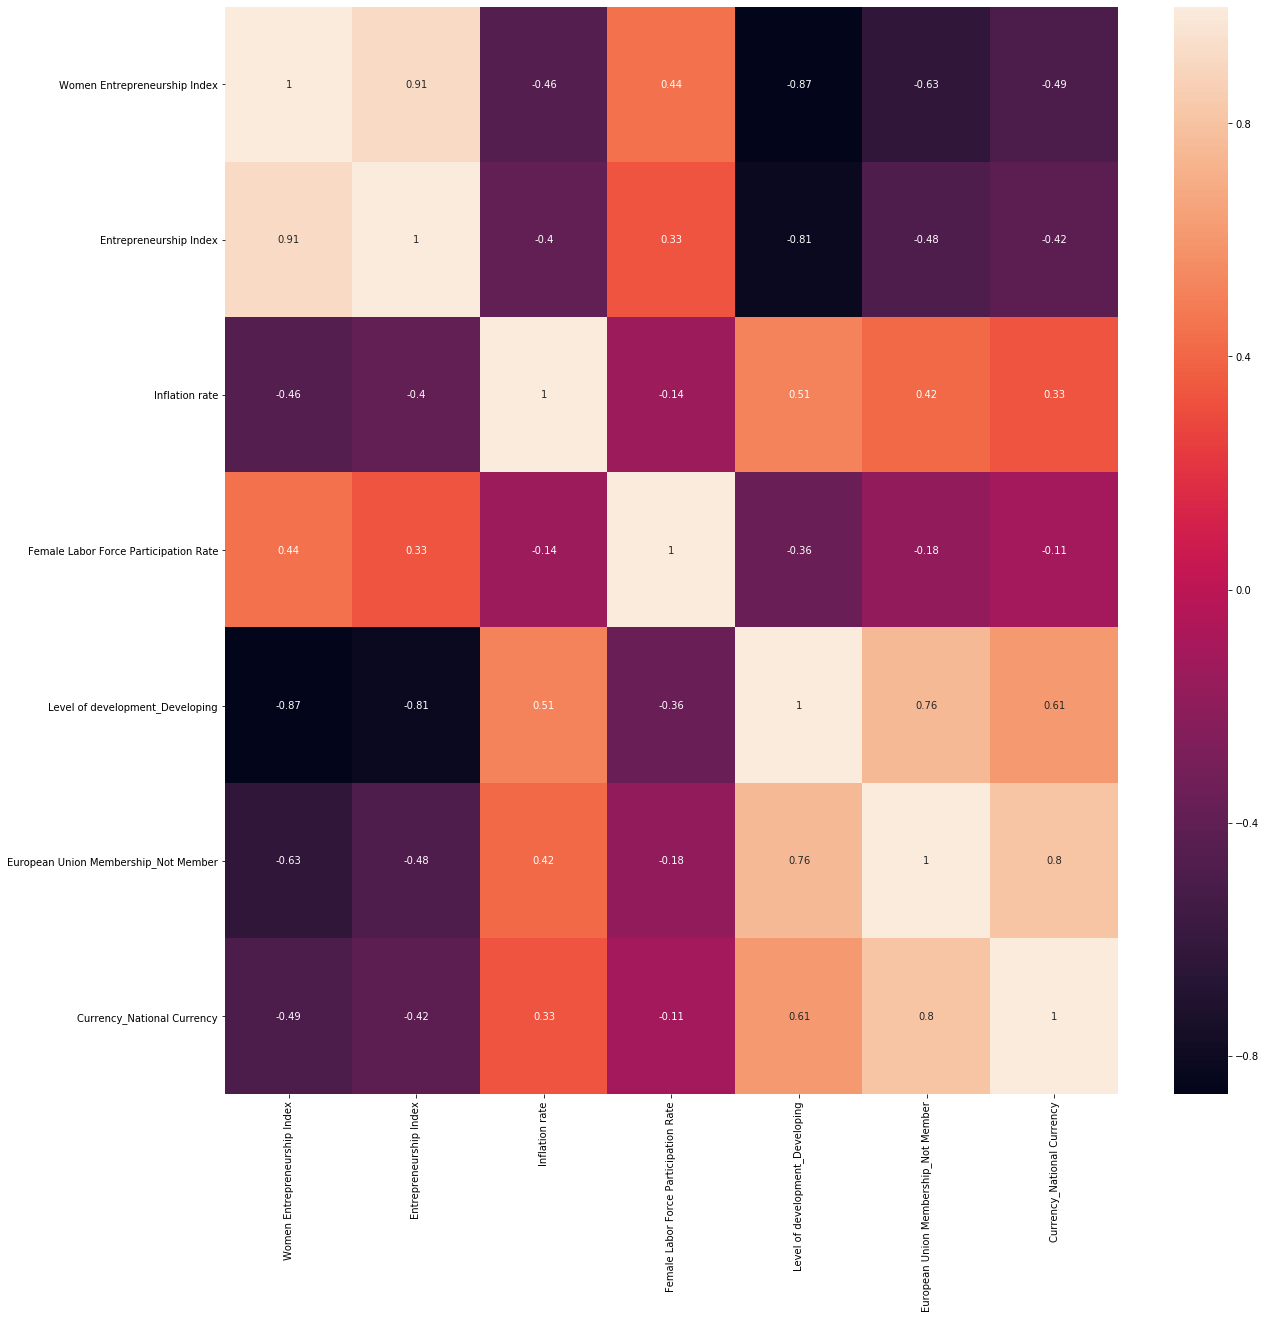

In [16]:
corre=df.corr()
Top=corre.index
plt.figure(figsize=(20,20))
sns.heatmap(df[Top].corr(),annot=True)

In [17]:
df.drop(columns=["Women Entrepreneurship Index"], inplace=True)
df.drop(columns=["Currency_National Currency"], inplace=True)
df.head()

,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Level of development_Developing,European Union Membership_Not Member
No,,,,,
4,64.9,0.90,67.1,0,0
6,65.5,0.60,58.0,0,0
17,60.2,-0.88,68.5,0,0
18,65.7,-0.20,67.7,0,0
19,67.3,0.00,60.6,0,0


# X and y and train test split


In [18]:

y=df["Female Labor Force Participation Rate"]
X=df.drop(columns="Female Labor Force Participation Rate", axis=1)


In [19]:
print(X["Entrepreneurship Index"].max())
print(X["Entrepreneurship Index"].min())
print(X["Inflation rate"].max())
print(X["Inflation rate"].min())
X["Entrepreneurship Index"]=(X["Entrepreneurship Index"]-X["Entrepreneurship Index"].min())/(X["Entrepreneurship Index"].max()-X["Entrepreneurship Index"].min())
X["Inflation rate"]=(X["Inflation rate"]-X["Inflation rate"].min())/(X["Inflation rate"].max()-X["Inflation rate"].min())

77.6
24.8
26.5
-2.25


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Extra Tree  regressor to find feature importance

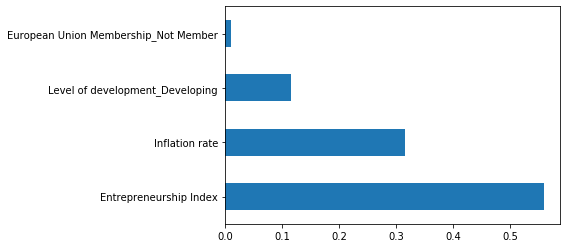

In [21]:
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor() 
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()


# LinearRegression

Coefficients: 
 [  1.45668277  13.32391723 -19.74330525   9.11543015]
Variance score: -0.19691813889801968


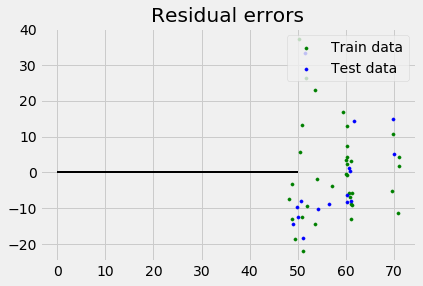

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, reg.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, reg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))))

MAE: 10.861648082539858
MSE: 173.9733606180416
RMSE: 13.18989615645406


# Saving the model

In [26]:
import pickle
# open a file, where you want to store the data
file = open('model.pkl', 'wb')
# dump information to that file
pickle.dump(reg, file)
file.close()

In [27]:
X_train

,Entrepreneurship Index,Inflation rate,Level of development_Developing,European Union Membership_Not Member
No,,,,
53,0.469697,0.060870,0,0
48,0.469697,0.120000,1,1
44,0.428030,0.046957,0,0
58,0.202652,0.245217,1,1
38,0.111742,0.172174,1,1
12,0.299242,0.060870,0,0
9,0.018939,0.449391,1,1
8,0.077652,0.043478,1,1
13,0.882576,0.095652,0,0
